In [423]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

# Multinomial Naive Bayes on Headlines Only

In [424]:
df = pd.read_csv('features.csv', sep='|', index_col=0)
df['Company'].value_counts()

Facebook          1977
Twitter            902
Alibaba            544
Groupon            426
General Motors     368
LinkedIn           193
Snapchat           185
Blue Apron         125
Fitbit             114
Etsy               104
Shake Shack        103
GoPro               91
Workday             90
Ferrari             46
Stitch Fix          33
Name: Company, dtype: int64

In [425]:
df.shape

(5301, 36)

## Tried Removing Facebook Since it Represented a Disproportionate Number of Instances

In [293]:
#df_woFB = df[df['Company'] != 'Facebook']
#df_woFB['Company'].value_counts()

In [426]:
## Replacing all the numbers in the text to 'NUM_' to simplify and reduce total featues
text_data = df['Headline'].replace('\d+', 'NUM_', regex=True)
#text_data = df['Headline']
#text_data = df_woFB['Headline'].replace('\d+', 'NUM_', regex=True)
text_data.shape

(5301,)

In [427]:
my_stop_words = ('facebook', 'linkedin', 'groupon', 'snap', 'twitter', 'alibaba', 'group', 'holding', 'etsy', 'fitbit',
                'workday', 'gopro', 'blue', 'apron', 'holdings', 'ferrari', 'general', 'motors', 'shake', 'shack',
                'stitch', 'fix', 'tesla', 'motors', 'num_', 'ipo', 'negative', 'neutral', 'positive')
stop_words = text.ENGLISH_STOP_WORDS.union(my_stop_words)

In [428]:
vectorizer = CountVectorizer(analyzer='word', stop_words=stop_words)

In [429]:
vectorizer.fit(text_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=frozenset({'beforehand', 'myself', 'will', 'an', 'bill', 'fifteen', 'how', 'show', 'hereafter', 'sixty', 'whereas', 'fill', 'nothing', 'almost', 'describe', 'into', 'take', 'toward', 'more', 'someone', 'due', 'everything', 'workday', 'now', 'nor', 'mill', 'under', 'but', 'them', 'other', ..., 'own', 'eight', 'much', 'us', 'get', 'three', 'yours', 'noone', 'less', 'cannot', 'ever', 'this'}),
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [430]:
vectorizer.get_feature_names()
#vectorizer.vocabulary_

['abandons',
 'abercrombie',
 'ability',
 'able',
 'abound',
 'abounding',
 'accel',
 'accelerate',
 'acceleration',
 'access',
 'accessibility',
 'accommodations',
 'according',
 'account',
 'accounting',
 'accounts',
 'accusations',
 'accused',
 'achievements',
 'achilles',
 'ackaman',
 'acquired',
 'acquisition',
 'acquisitions',
 'acsoi',
 'act',
 'action',
 'actions',
 'active',
 'activity',
 'ad',
 'adapt',
 'add',
 'added',
 'adding',
 'additional',
 'address',
 'addressed',
 'addressing',
 'adds',
 'admits',
 'adp',
 'adrs',
 'ads',
 'advance',
 'adventure',
 'advertis',
 'advertisers',
 'advertisi',
 'advertising',
 'advice',
 'advise',
 'adviser',
 'advisers',
 'advisory',
 'advocates',
 'affair',
 'affect',
 'affected',
 'affects',
 'affordable',
 'aflutter',
 'afraid',
 'aftermath',
 'aftershocks',
 'age',
 'agency',
 'agenda',
 'agent',
 'aggregate',
 'aggressive',
 'ago',
 'agreements',
 'agrees',
 'ah',
 'ahead',
 'ailing',
 'aim',
 'aiming',
 'aims',
 'ain',
 'air',
 'a

In [431]:
pd.DataFrame.from_dict(vectorizer.vocabulary_, orient='index').sort_values(by=0, ascending=False).head()

,0
œtwitter,4682
œquiet,4681
œmarried,4680
œlife,4679
œkick,4678


#### Transform to Document Term Matrix

In [432]:
dtm = vectorizer.transform(text_data)
dtm

<5301x4683 sparse matrix of type '<class 'numpy.int64'>'
	with 28952 stored elements in Compressed Sparse Row format>

In [433]:
Text_Features = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names())
Text_Features.shape

(5301, 4683)

In [302]:
#Text_Features.to_csv('TEXT_FEATURES.csv')

In [435]:
Text_Features.shape

(5301, 4683)

In [436]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

X = Text_Features
y = np.array(df['Label'].tolist())
#y = np.array(df_woFB['Label'].tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(3975, 4683) (3975,)


In [437]:
len(X)

5301

In [438]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [439]:
X_train_pca = pca.transform(X)
print('Original shape:        ', X.shape)
print('Transformed shape:     ', X_pca.shape)

Original shape:         (5301, 4683)
Transformed shape:      (4389, 1685)


In [440]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_pca)
X_pca = scaler.transform(X_pca)

In [441]:
pca.n_components_
#pca.explained_variance_ratio_

996

In [442]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

#X_pca = Text_Features
#y = np.array(df['Label'].tolist())
#len(y)
#X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=33)
#print(X_train.shape, y_train.shape)

In [443]:
nb = MultinomialNB()

In [444]:
X_pca

array([[ 0.22230243,  0.22021945,  0.28200049, ...,  0.39632534,
         0.6686228 ,  0.49079716],
       [ 0.55943684,  0.26264562,  0.42359363, ...,  0.380483  ,
         0.47784322,  0.47034124],
       [ 0.53681388,  0.27979308,  0.38331103, ...,  0.43180922,
         0.51323328,  0.46416934],
       ..., 
       [ 0.53268761,  0.33228955,  0.235895  , ...,  0.54784428,
         0.48302283,  0.50791861],
       [ 0.66164205,  0.36779175,  0.14491587, ...,  0.35866635,
         0.48128937,  0.6218293 ],
       [ 0.19630482,  0.21115752,  0.42965258, ...,  0.60835717,
         0.42832988,  0.34017604]])

In [445]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [446]:
y_pred_class = nb.predict(X_test)

In [447]:
#metrics.accuracy_score(y_test, y_pred_class)
metrics.accuracy_score(y_test, y_pred_class)

0.77375565610859731

In [448]:
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

   Negative       0.80      0.81      0.81       770
   Positive       0.73      0.73      0.73       556

avg / total       0.77      0.77      0.77      1326



## Yellowbrick Classification Report

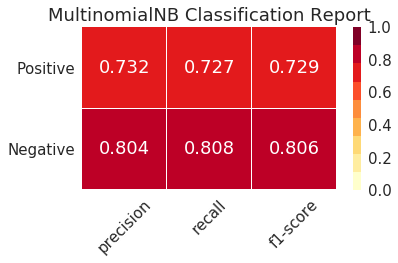

In [449]:
from yellowbrick.classifier import ClassificationReport
bayes = MultinomialNB()
visualizer = ClassificationReport(bayes, classes=['Negative', 'Positive'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

## Confusion Matrix

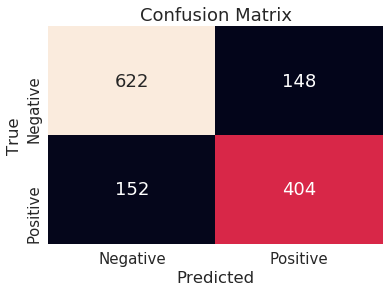

In [450]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
sns.set(font_scale=1.5)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)


ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
#plt.tight_layout()
#plt.figure(figsize=(10,10))
plt.show()

# Same Analysis on Story Text

In [451]:
stories = pd.read_csv('Text.csv', index_col=0)
stories.head()

,Text,Label,Label180
0,Facebook wooed Madison Avenue on Wednesday wit...,Negative,Negative
1,Facebook Inc. priced its shares in its initial...,Negative,Negative
2,NEW YORK -- Securities regulators are amping u...,Negative,Negative
3,WASHINGTON -- A class-action lawsuit was filed...,Negative,Negative
4,The most anticipated IPO since Google is one s...,Negative,Negative


In [452]:
text_data = stories['Text'].replace('\d+', 'NUM_', regex=True)

In [453]:
vectorizer = CountVectorizer(analyzer='word', stop_words=stop_words)

In [454]:
vectorizer.fit(text_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=frozenset({'beforehand', 'myself', 'will', 'an', 'bill', 'fifteen', 'how', 'show', 'hereafter', 'sixty', 'whereas', 'fill', 'nothing', 'almost', 'describe', 'into', 'take', 'toward', 'more', 'someone', 'due', 'everything', 'workday', 'now', 'nor', 'mill', 'under', 'but', 'them', 'other', ..., 'own', 'eight', 'much', 'us', 'get', 'three', 'yours', 'noone', 'less', 'cannot', 'ever', 'this'}),
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [455]:
pd.DataFrame.from_dict(vectorizer.vocabulary_, orient='index').sort_values(by=0, ascending=False).head()

,0
œwebsitesâ,7816
œwe,7815
œunique,7814
œunfriendingâ,7813
œtwtrâ,7812


In [456]:
dtm = vectorizer.transform(text_data)
dtm

<4389x7817 sparse matrix of type '<class 'numpy.int64'>'
	with 75098 stored elements in Compressed Sparse Row format>

In [457]:
Text_Features = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names())
Text_Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4389 entries, 0 to 4388
Columns: 7817 entries, _follow_along to œwebsitesâ
dtypes: int64(7817)
memory usage: 261.8 MB


## Target is +90 Price Change Using Full Story Text

In [458]:
X = Text_Features
y = np.array(stories['Label'].tolist())
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)
"""
print(X.shape, y.shape)

(4389, 7817) (4389,)


In [459]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [460]:
X_pca = pca.transform(X)
print('Original shape:        ', X.shape)
print('Transformed shape:     ', X_pca.shape)

Original shape:         (4389, 7817)
Transformed shape:      (4389, 1685)


In [461]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_pca)
X_pca = scaler.transform(X_pca)
X_pca.shape, y.shape

((4389, 1685), (4389,))

In [462]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

#X_pca = Text_Features
#y = np.array(df['Label'].tolist())
#len(y)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(3291, 1685) (3291,)


In [463]:
nb = MultinomialNB()

In [464]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [465]:
y_pred_class = nb.predict(X_test)

In [466]:
metrics.accuracy_score(y_test, y_pred_class)

0.56739526411657559

In [467]:
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

   Negative       0.57      1.00      0.72       623
   Positive       0.00      0.00      0.00       475

avg / total       0.32      0.57      0.41      1098



/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


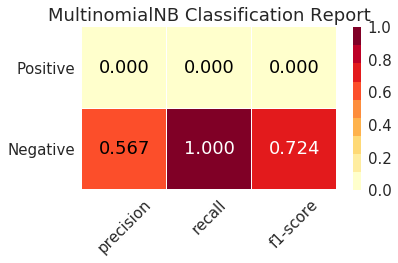

In [468]:
from yellowbrick.classifier import ClassificationReport
bayes = MultinomialNB()
visualizer = ClassificationReport(bayes, classes=['Negative', 'Positive'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

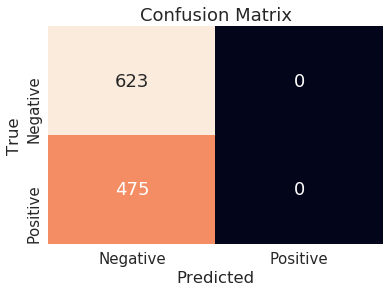

In [469]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
sns.set(font_scale=1.5)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)


ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
#plt.tight_layout()
#plt.figure(figsize=(10,10))
plt.show()

## Target is +180 Price Change Using Full Story Text

In [470]:
#X = Text_Features
y = np.array(stories['Label180'].tolist())

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=33)
print(X_train.shape, y_train.shape)

(3291, 1685) (3291,)


In [471]:
nb = MultinomialNB()

In [472]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [473]:
y_pred_class = nb.predict(X_test)

In [474]:
metrics.accuracy_score(y_test, y_pred_class)

0.92622950819672134

In [475]:
print(metrics.classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

   Negative       0.93      1.00      0.96      1017
    Neutral       0.00      0.00      0.00        22
   Positive       0.00      0.00      0.00        59

avg / total       0.86      0.93      0.89      1098



/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/home/mji/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


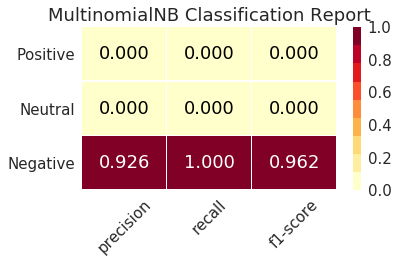

In [476]:
from yellowbrick.classifier import ClassificationReport
bayes = MultinomialNB()
visualizer = ClassificationReport(bayes, classes=['Negative', 'Neutral', 'Positive'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

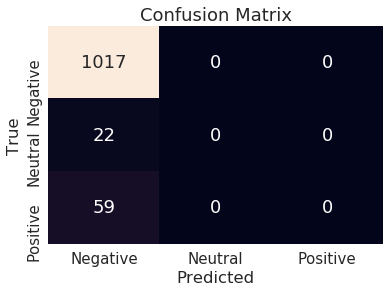

In [477]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
sns.set(font_scale=1.5)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g', cbar=False)


ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive'])
#plt.tight_layout()
#plt.figure(figsize=(10,10))
plt.show()